# Model Design and Logistic Regression in Python

I recently modeled customer churn in Julia with logistic regression model.  It was interesting to be sure, but I want to extend my analysis skillset by modeling biostatistics data.  In this post, I design a logistic regression model of health predictors.

## Imports

In [146]:
# load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from google.cloud import bigquery
from pprint import pprint
from datetime import date, datetime
import contextily as cx
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Data Import

include a raw html here  to include the project description data file in the final markdown document

### Data  Description

Chinese Longitudinal Healthy Longevity Survey (CLHLS), Biomarkers Datasets, 2009, 2012, 2014 (ICPSR 37226)
Principal Investigator(s): Yi Zeng, Duke University, and Peking University; James W. Vaupel, Max Planck Institutes, and Duke University

In [147]:
filename = "/Users/jnapolitano/Projects/nih/ICPSR_37226/DS0003/pmc-submission/jupyter-book/notebooks/37226-0003-Data.tsv"
df = pd.read_csv(filename, sep='\t')

In [148]:
# read data in pandas dataframe


# list first few rows (datapoints)
df.head()

,ID,TRUEAGE,A1,ALB,GLU,BUN,CREA,CHO,TG,GSP,...,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,MPV,PDW,PCT
0,32160008,95,2,30.60000038147,4.230000019073,6.860000133514,64.90000152588,3.5,.8799999952316,232.89999389649,...,3.5,104,29.14999961853,82.69999694825,29.5,357,394,8.60000038147,14.30000019074,.33000001311
1,32161008,95,2,39.09999847413,6.94000005722,16.190000534058,152.39999389649,4.619999885559,1.2799999713898,264.20001220704,...,3.2999999523163,101.3000030518,28.930000305176,88.90000152588,31.10000038147,350,149,9.10000038147,15,.12999999523
2,32162608,87,2,44.79999923707,5.550000190735,5.679999828339,78.5,5.199999809265,2.3900001049042,276.20001220704,...,3.5999999046326,111.3000030518,31.159999847412,87.59999847413,31.29999923707,357,201,8.30000019074,12,.15999999642
3,32163008,90,2,41.29999923707,5.269999980927,5.949999809265,75.80000305176,4.25,1.5499999523163,264.20001220704,...,3.7000000476837,113.9000015259,32.900001525879,89.69999694825,31.10000038147,346,150,9.89999961854,16.79999923707,.1400000006
4,32164908,94,2,39.90000152588,7.05999994278,6.039999961853,90.80000305176,7.139999866486,2.3399999141693,237.69999694825,...,4.1999998092651,131.1999969483,36.689998626709,88.5,31.60000038147,358,163,9.69999980927,17.79999923707,.15000000596


In [5]:
df.describe()

,ID
count,2.546000e+03
mean,4.069177e+07
std,4.367164e+06
min,3.216001e+07
25%,3.743344e+07
50%,4.135976e+07
75%,4.430106e+07
max,4.611231e+07


In [6]:
df.columns

Index(['ID', 'TRUEAGE', 'A1', 'ALB', 'GLU', 'BUN', 'CREA', 'CHO', 'TG', 'GSP',
       'CRPHS', 'UA', 'HDLC', 'SOD', 'MDA', 'VD3', 'VITB12', 'UALB', 'UCR',
       'UALBBYUCR', 'WBC', 'LYMPH', 'LYMPH_A', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'MPV', 'PDW', 'PCT'],
      dtype='object')

In [7]:
# check datatypesdf
df.dtypes

ID            int64
TRUEAGE      object
A1           object
ALB          object
GLU          object
BUN          object
CREA         object
CHO          object
TG           object
GSP          object
CRPHS        object
UA           object
HDLC         object
SOD          object
MDA          object
VD3          object
VITB12       object
UALB         object
UCR          object
UALBBYUCR    object
WBC          object
LYMPH        object
LYMPH_A      object
RBC          object
HGB          object
HCT          object
MCV          object
MCH          object
MCHC         object
PLT          object
MPV          object
PDW          object
PCT          object
dtype: object

Everything was read an object.  Blah. I'll cast everything to numeric... Thank you numpy



In [8]:
# replace empty space with na
df = df.replace(" ", np.nan)

In [9]:
# convert numeric objects to numeric data types.  I checked in the code book there will not be any false positives
df = df.apply(pd.to_numeric, errors='raise')

In [10]:
# Recheck dictypes
df.dtypes

ID             int64
TRUEAGE      float64
A1           float64
ALB          float64
GLU          float64
BUN          float64
CREA         float64
CHO          float64
TG           float64
GSP          float64
CRPHS        float64
UA           float64
HDLC         float64
SOD          float64
MDA          float64
VD3          float64
VITB12       float64
UALB         float64
UCR          float64
UALBBYUCR    float64
WBC          float64
LYMPH        float64
LYMPH_A      float64
RBC          float64
HGB          float64
HCT          float64
MCV          float64
MCH          float64
MCHC         float64
PLT          float64
MPV          float64
PDW          float64
PCT          float64
dtype: object

In [11]:
# check statistics of the features
df.describe()

,ID,TRUEAGE,A1,ALB,GLU,BUN,CREA,CHO,TG,GSP,...,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,MPV,PDW,PCT
count,2.546000e+03,2542.000000,2542.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,...,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2487.000000,2483.000000,1711.000000
mean,4.069177e+07,85.584972,1.543273,42.363345,5.364794,6.661321,82.805642,4.770340,1.251369,253.726811,...,4.165012,127.684902,38.664654,94.532295,31.033849,323.221826,195.033440,9.322951,16.114692,0.244237
std,4.367164e+06,12.061941,0.498222,4.367372,1.802363,2.355459,29.246926,1.010844,0.757557,38.658243,...,0.602123,33.852642,7.163306,7.624568,11.041158,20.995983,76.322382,4.468129,4.264532,2.679986
min,3.216001e+07,47.000000,1.000000,21.900000,1.960000,2.090000,30.500000,0.070000,0.030000,139.899994,...,1.910000,13.000000,0.280000,54.799999,15.900000,3.900000,9.000000,0.000000,5.500000,0.020000
25%,3.743344e+07,76.000000,1.000000,40.000000,4.400000,5.150000,66.599998,4.090000,0.800000,232.600006,...,3.780000,115.000000,35.400002,91.300003,29.500000,317.000000,150.000000,8.200000,15.300000,0.140000
50%,4.135976e+07,86.000000,2.000000,42.799999,5.020000,6.380000,77.000000,4.690000,1.050000,248.800003,...,4.160000,127.000000,39.000000,95.400002,31.200001,325.000000,189.000000,9.300000,16.000000,0.170000
75%,4.430106e+07,95.000000,2.000000,45.000000,5.790000,7.695000,92.099998,5.370000,1.470000,266.899994,...,4.540000,140.000000,42.700001,98.900002,32.500000,333.000000,229.000000,10.300000,16.799999,0.210000
max,4.611231e+07,113.000000,2.000000,130.000000,22.000000,39.860001,585.099976,13.070000,8.150000,778.000000,...,7.210000,1116.000000,70.199997,125.800003,371.000000,429.000000,1514.000000,107.000000,153.000000,111.000000


It is kind of odd that there are greater counts for some rows. I'll remove all na.

Checking for negative values and anything else I missed from the initial sql clean:

In [12]:
df = df.dropna()

In [13]:
df.describe()

,ID,TRUEAGE,A1,ALB,GLU,BUN,CREA,CHO,TG,GSP,...,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,MPV,PDW,PCT
count,1.561000e+03,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,...,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000
mean,3.951369e+07,84.782191,1.534914,42.445292,5.334414,6.898834,84.107880,4.806336,1.243748,254.537604,...,4.060587,126.936387,38.154004,94.416284,31.500461,329.142217,190.152082,10.006560,15.777220,0.251365
std,4.702774e+06,12.056596,0.498939,4.659920,1.707653,2.292577,29.500260,0.999193,0.775910,39.858537,...,0.589037,39.956758,5.261258,7.701819,11.723908,16.978577,71.839722,4.453105,5.142069,2.805686
min,3.216101e+07,48.000000,1.000000,21.900000,1.960000,2.140000,30.500000,0.340000,0.070000,139.899994,...,2.100000,13.000000,13.200000,56.000000,17.500000,35.000000,25.000000,0.200000,5.500000,0.020000
25%,3.736671e+07,76.000000,1.000000,39.900002,4.400000,5.370000,67.000000,4.120000,0.780000,231.600006,...,3.680000,114.000000,34.799999,91.199997,30.100000,320.000000,147.000000,8.800000,15.400000,0.140000
50%,3.745741e+07,85.000000,2.000000,42.900002,4.990000,6.610000,77.599998,4.730000,1.040000,249.800003,...,4.060000,126.000000,38.200001,95.400002,31.400000,328.000000,185.000000,9.600000,15.900000,0.170000
75%,4.332561e+07,94.000000,2.000000,45.099998,5.780000,7.960000,93.199997,5.420000,1.460000,268.899994,...,4.400000,137.000000,41.599998,98.900002,32.700001,337.000000,227.000000,10.600000,16.299999,0.210000
max,4.581641e+07,113.000000,2.000000,130.000000,20.760000,23.549999,392.000000,8.490000,8.150000,778.000000,...,7.210000,1116.000000,70.199997,125.800003,371.000000,408.000000,1302.000000,107.000000,153.000000,111.000000


We remove about 4/5 of our data, but the counts are not equivalent.

## Age Histogram

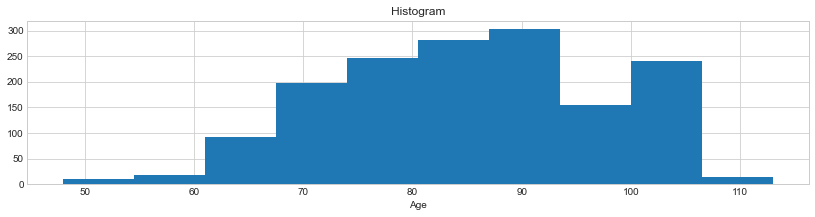

In [18]:
# plot histogram of fare
df.TRUEAGE.hist(figsize=(14,3))
plt.xlabel('Age')
plt.title('Histogram');

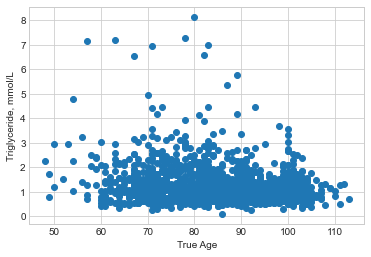

In [29]:
#idx = (df.trip_distance < 3) & (gdf.fare_amount < 100)
plt.scatter(df.TRUEAGE, df.TG)
plt.xlabel('True Age')
plt.ylabel('Triglyceride, mmol/L')

# theta here is estimated by hand
plt.show()

## Filter Examples

To fit the specificities of the conditions in the training video I'll add some randomized columns.  

In [63]:
n = df.shape[0]
lower_bound = 0 #inclusive
upper_bound = 2 # exclusive
emergency_department =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["EMERGENCY"] = emergency_department


In [64]:
n = df.shape[0]
lower_bound = 0 #inclusive
upper_bound = 100 # exclusive
cancer_care =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["CANCER_TYPE"] = cancer_care

In [65]:
n = df.shape[0]
lower_bound = 0 #inclusive 
#0 = no
#1 = ICPI
# 2 MONO 
upper_bound = 3 # exclusive
icpi_history =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["ICPI_HIST"] = icpi_history

In [66]:
n = df.shape[0]
lower_bound = 0 #inclusive
upper_bound = 2# exclusive
# Spanish = 0
# English = 1
# Arbitrarily chosen. 
language =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["LANG"] = language

In [67]:
n = df.shape[0]
lower_bound = 0 #inclusive
upper_bound = 2 # exclusive
follow_up =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["FOLLOW_UP"] = follow_up

In [68]:
n = df.shape[0]
lower_bound = 0 #inclusive
upper_bound = 2 # exclusive
# 0 = no
# 1 = Yes
cons =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["CONSENT"] = cons

In [69]:
n = df.shape[0]
lower_bound = 0 #inclusive
upper_bound = 2 # exclusive
# 0 = no
# 1 = Yes
prego =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["PREGNANT"] = prego

In [70]:
df

,ID,TRUEAGE,A1,ALB,GLU,BUN,CREA,CHO,TG,GSP,...,MPV,PDW,PCT,EMERGENCY,CANCER_TYPE,ICPI_HIST,LANG,FOLLOW_UP,CONSENT,PREGNANT
1,32161008,95.0,2.0,39.099998,6.94,16.190001,152.399994,4.62,1.28,264.200012,...,9.1,15.000000,0.13,0,10,1,1,0,0,1
2,32162608,87.0,2.0,44.799999,5.55,5.680000,78.500000,5.20,2.39,276.200012,...,8.3,12.000000,0.16,0,14,1,1,0,1,1
3,32163008,90.0,2.0,41.299999,5.27,5.950000,75.800003,4.25,1.55,264.200012,...,9.9,16.799999,0.14,0,94,0,0,1,1,0
6,32166108,89.0,2.0,45.000000,8.80,13.170000,147.000000,3.19,1.72,336.399994,...,8.2,12.300000,0.12,1,75,1,0,1,1,0
7,32167608,100.0,2.0,40.099998,4.34,5.950000,76.000000,5.67,1.44,223.300003,...,10.8,16.400000,0.20,1,58,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,45816014,98.0,2.0,37.000000,6.04,5.010000,59.299999,3.84,0.95,195.300003,...,9.9,16.200001,0.26,1,93,0,0,1,1,0
2266,45816114,69.0,1.0,46.299999,5.99,5.030000,85.500000,4.43,1.44,224.000000,...,10.4,16.000000,0.23,1,25,1,1,0,1,1
2267,45816214,93.0,2.0,42.599998,5.53,6.320000,85.500000,4.03,0.92,249.800003,...,11.1,16.299999,0.14,1,66,1,1,0,1,0
2268,45816314,91.0,2.0,43.400002,5.82,7.770000,72.099998,4.29,1.08,259.299988,...,10.0,15.900000,0.20,0,77,2,0,0,1,0


### Writing the Filter

Writing a quick filter to ensure eligibiity.  This could, and probably should be written functionally, but so it goes.

In [72]:
# Greater than 18
# CANCER TYPE IS NOT equal to a non-malanoma skin cancer ie 5 arbitrarily chosen 
# Patient Seeking care in emergency department is true
# History is not equal to 0. Ie not recieving either.  IDK how it would be provided.  It could also possibly be written as equal to 1 or 2
# Lang is either english or spanish
# Patient Agrees to Follow Up
# Patient Consents
# Patient is Not Pregnant

idx_spanish = (df.TRUEAGE > 18) & (df.CANCER_TYPE != 5) & (df.EMERGENCY == 1) & \
        (df.ICPI_HIST == 0) & (df.LANG == 0) & (df.FOLLOW_UP == 1) & (df.CONSENT == 1) & (df.PREGNANT == 0)

# Ideally the english and spanish speakers would have been filtered prior to this, but for the sake of exploration this will work. 
idx_english = (df.TRUEAGE > 18) & (df.CANCER_TYPE != 5) & (df.EMERGENCY == 1) & \
        (df.ICPI_HIST == 0) & (df.LANG == 1) & (df.FOLLOW_UP == 1) & (df.CONSENT == 1) & (df.PREGNANT == 0)


In [78]:

filtered_df = pd.concat([df[idx_english], df[idx_spanish]], ignore_index=True)

In [79]:
filtered_df.describe()

,ID,TRUEAGE,A1,ALB,GLU,BUN,CREA,CHO,TG,GSP,...,MPV,PDW,PCT,EMERGENCY,CANCER_TYPE,ICPI_HIST,LANG,FOLLOW_UP,CONSENT,PREGNANT
count,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.0,43.000000,43.0,43.000000,43.0,43.0,43.0
mean,4.016529e+07,83.534884,1.604651,43.174419,5.397674,7.680698,87.769768,5.216744,1.609302,253.172094,...,9.613953,15.353488,0.202093,1.0,53.604651,0.0,0.465116,1.0,1.0,0.0
std,4.398812e+06,10.443382,0.494712,3.597029,1.360812,2.461784,30.562509,1.068372,1.144799,32.250908,...,1.306865,1.739779,0.105640,0.0,30.090451,0.0,0.504685,0.0,0.0,0.0
min,3.216841e+07,61.000000,1.000000,35.599998,2.550000,3.690000,53.900002,3.560000,0.580000,195.300003,...,7.300000,7.900000,0.070000,1.0,0.000000,0.0,0.000000,1.0,1.0,0.0
25%,3.743001e+07,76.000000,1.000000,41.000000,4.685000,6.200000,68.950001,4.405000,0.895000,231.600006,...,8.700000,15.350000,0.150000,1.0,33.500000,0.0,0.000000,1.0,1.0,0.0
50%,3.745411e+07,83.000000,2.000000,43.700001,5.230000,7.510000,79.300003,5.260000,1.180000,250.699997,...,9.300000,15.800000,0.180000,1.0,51.000000,0.0,0.000000,1.0,1.0,0.0
75%,4.460921e+07,90.000000,2.000000,45.199999,5.920000,8.360000,96.349998,5.940000,2.035000,272.299988,...,10.350000,16.299999,0.225000,1.0,82.500000,0.0,1.000000,1.0,1.0,0.0
max,4.581601e+07,103.000000,2.000000,50.599998,11.500000,15.510000,197.500000,8.180000,7.180000,337.600006,...,13.000000,16.799999,0.770000,1.0,99.000000,0.0,1.000000,1.0,1.0,0.0


In [80]:
filtered_df.shape[0]
#only 43 left following the filter. 

43

Following the filter only 43 data are left in the set.  A workflow similiar to this could be used to identify possible survey recruits from aggregated chart data.  

## Logistic Regression Sample

I am surpirsed by the low level of samples left following the filter.  To avoid a small n, I will use the initial dataset. 


In [84]:
filename = "/Users/jnapolitano/Projects/nih/ICPSR_37226/DS0003/pmc-submission/jupyter-book/notebooks/37226-0003-Data.tsv"
df = pd.read_csv(filename, sep='\t')

# replace empty space with na
df = df.replace(" ", np.nan)

# convert numeric objects to numeric data types.  I checked in the code book there will not be any false positives
df = df.apply(pd.to_numeric, errors='raise')
df = df.dropna()

In [85]:
df

,ID,TRUEAGE,A1,ALB,GLU,BUN,CREA,CHO,TG,GSP,...,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,MPV,PDW,PCT
1,32161008,95.0,2.0,39.099998,6.94,16.190001,152.399994,4.62,1.28,264.200012,...,3.30,101.300003,28.930000,88.900002,31.100000,350.0,149.0,9.1,15.000000,0.13
2,32162608,87.0,2.0,44.799999,5.55,5.680000,78.500000,5.20,2.39,276.200012,...,3.60,111.300003,31.160000,87.599998,31.299999,357.0,201.0,8.3,12.000000,0.16
3,32163008,90.0,2.0,41.299999,5.27,5.950000,75.800003,4.25,1.55,264.200012,...,3.70,113.900002,32.900002,89.699997,31.100000,346.0,150.0,9.9,16.799999,0.14
6,32166108,89.0,2.0,45.000000,8.80,13.170000,147.000000,3.19,1.72,336.399994,...,3.00,92.599998,26.340000,88.500000,31.100000,352.0,157.0,8.2,12.300000,0.12
7,32167608,100.0,2.0,40.099998,4.34,5.950000,76.000000,5.67,1.44,223.300003,...,3.76,114.000000,35.400002,94.099998,30.299999,322.0,193.0,10.8,16.400000,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,45816014,98.0,2.0,37.000000,6.04,5.010000,59.299999,3.84,0.95,195.300003,...,4.31,122.000000,38.900002,90.300003,28.299999,313.0,267.0,9.9,16.200001,0.26
2266,45816114,69.0,1.0,46.299999,5.99,5.030000,85.500000,4.43,1.44,224.000000,...,4.46,133.000000,42.200001,94.599998,29.799999,315.0,230.0,10.4,16.000000,0.23
2267,45816214,93.0,2.0,42.599998,5.53,6.320000,85.500000,4.03,0.92,249.800003,...,4.60,137.000000,43.799999,95.199997,29.799999,313.0,129.0,11.1,16.299999,0.14
2268,45816314,91.0,2.0,43.400002,5.82,7.770000,72.099998,4.29,1.08,259.299988,...,4.14,122.000000,39.000000,94.300003,29.500000,312.0,200.0,10.0,15.900000,0.20


### The Model

There is strong suspicion that biomarkers can determine whether a patient should be admitted for emergency care.  In this simplified model, I will randomly distribute proper disposition across the dataset. 

In [100]:
n = df.shape[0]
lower_bound = 0 #inclusive
upper_bound = 2 # exclusive
# 0 = no
# 1 = Yes
tmp =  np.random.randint(low=lower_bound , high = upper_bound, size = n)
df["PROP_DISPOSITION"] = tmp

### Create Test and Train Set

This could be randomly sampled as well...

#### Random Sample

In [102]:
# copy in memory to avoid errors.  This could be done from files or in other ways if memory is limited.  
master_table = df.copy()

### Test Sample Set with 10,000 Randomly Selected from the Master with Replacement

In [132]:
test_sample = master_table.sample(n=10000,replace=True)


In [133]:
targets = test_sample.pop("PROP_DISPOSITION")

#### Seperate Train and Test Sets

In [134]:
x_train, x_test, y_train, y_test = train_test_split(test_sample, targets, test_size=0.2, random_state=0)

#### Data Standardization

Calculate the mean and standard deviation for each column.
Subtract the corresponding mean from each element.
Divide the obtained difference by the corresponding standard deviation.


Thankfully this is built into SKLearn.  

In [135]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

### Create the Model

In [136]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

### Evaluate Model

In [137]:
x_test = scaler.transform(x_test)

In [138]:
y_pred = model.predict(x_test)

### Model Scoring

With completely randomized values the score should be about 50%. If it is significantly greater than there is probably a problem with the model.  

In [139]:
model.score(x_train, y_train)


0.537125

In [140]:
model.score(x_test, y_test)

0.5125

Results are expected

### Confusion matrix

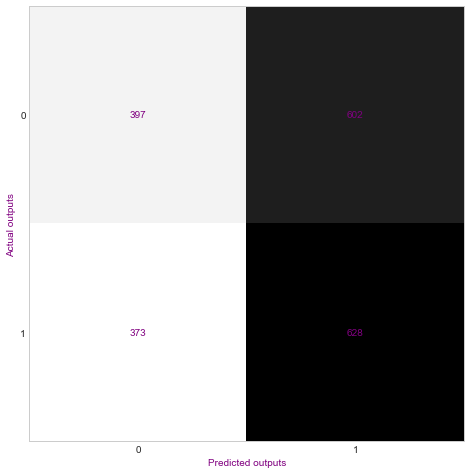

In [144]:
cm = confusion_matrix(y_test, y_pred)
font_size = 10

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='purple')
ax.set_ylabel('Actual outputs', color='purple')
ax.xaxis.set(ticks=range(len(cm)))
ax.yaxis.set(ticks=range(len(cm)))
#ax.set_ylim(0, 1)
for i in range(len(cm)):
    for j in range(len(cm)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='purple')
plt.show()

Because the data is randomized it makes the model is accurate about 50% of the time.  

### Printing the Classification Report

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45       999
           1       0.51      0.63      0.56      1001

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

